In [6]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
sns.set(style="whitegrid", palette="muted")

In [42]:
train = pd.read_csv('train2.csv')
mir_train = train.rename(columns={'team1':'team2', 'team2':'team1', 'score1':'score2', 'score2':'score1'})
mir_train['target'] = 1 - mir_train.target
train = pd.concat([train, mir_train])
train = train.reset_index().sort_values(by=['index']).drop('index', axis=1)

In [43]:
d = train[np.logical_and(train.day == 28, train.year == 3019)]
d.head(15)

,day,score1,score2,target,team1,team2,year
198502,28,332,278,1,2,186,3019
96893,28,278,332,0,186,2,3019
96894,28,301,216,1,14,139,3019
198503,28,216,301,0,139,14,3019
96895,28,282,278,1,17,46,3019
198504,28,278,282,0,46,17,3019
198505,28,193,189,1,30,20,3019
96896,28,189,193,0,20,30,3019
198506,28,236,263,0,35,36,3019
96897,28,263,236,1,36,35,3019


In [44]:
d[d.target == 1].head(15)

,day,score1,score2,target,team1,team2,year
198502,28,332,278,1,2,186,3019
96894,28,301,216,1,14,139,3019
96895,28,282,278,1,17,46,3019
198505,28,193,189,1,30,20,3019
96897,28,263,236,1,36,35,3019
96898,28,313,239,1,40,327,3019
198508,28,228,212,1,41,360,3019
198509,28,328,294,1,59,284,3019
198510,28,232,205,1,61,76,3019
198511,28,325,286,1,82,364,3019


In [45]:
d[d.target == 0].head(15)

,day,score1,score2,target,team1,team2,year
96893,28,278,332,0,186,2,3019
198503,28,216,301,0,139,14,3019
198504,28,278,282,0,46,17,3019
96896,28,189,193,0,20,30,3019
198506,28,236,263,0,35,36,3019
198507,28,239,313,0,327,40,3019
96899,28,212,228,0,360,41,3019
96900,28,294,328,0,284,59,3019
96901,28,205,232,0,76,61,3019
96902,28,286,325,0,364,82,3019


In [46]:
def order_feature(t):
    n = t.shape[0]
    x = np.zeros(n)
    for s in np.arange(n):
        x += (t < t[s]).astype(int) * (np.arange(n) < s).astype(int)
        x += (t > t[s]).astype(int) * (np.arange(n) > s).astype(int)
    return x

train['f1'] = 0
train['f2'] = 0
for y, d in set(zip(train.year, train.day)):
    ind = np.logical_and(train.year == y, train.day == d)
    t1 = train[ind].team1.values
    t2 = train[ind].team2.values
    train.loc[ind, 'f1'] = order_feature(t1)
    train.loc[ind, 'f2'] = order_feature(t2)

In [47]:
train['f'] = train.f1 - train.f2

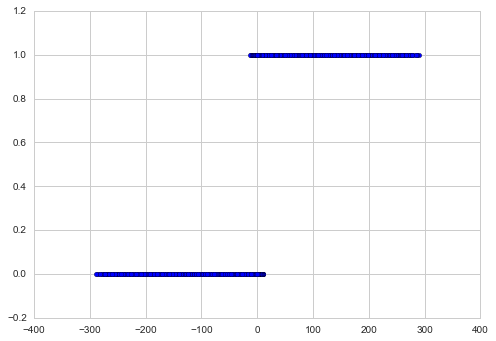

In [48]:
plt.scatter(train.f, train.target);

In [51]:
n = 100
lr = LogisticRegression()
lr.fit(train[['f']][:n], train.target[:n])
pred = lr.predict_proba(train[['f']][n:])[:,1]
print log_loss(train.target[n:], pred)

0.131749926031
